<a href="https://colab.research.google.com/github/purvikabajaj/ML-Lab-Semester-VII/blob/master/FFNN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow import keras

In [2]:
mnist = tf.keras.datasets.mnist

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data() 

11493376/11490434 [==============================] - 0s 0us/step


[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  64
  253 255  63   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  96 205
  251 253 205 111   4   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  96 189 251
  251 253 251 251  31   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  16  64 223 244 251 251
  211 213 251 251  31   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  80 181 251 253 25

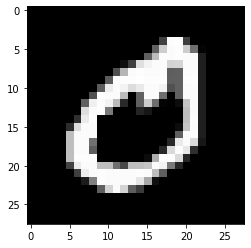

In [4]:
print(x_train[21])
plt.imshow(x_train[21], cmap='gray')

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

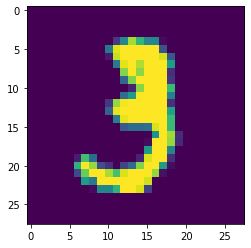

In [5]:
print(x_train[10])
plt.imshow(x_train[10])

In [6]:
print('Training Data: ', x_train.shape, y_train.shape)
print('Testing Data: ', x_test.shape, y_test.shape)

Training Data:  (60000, 28, 28) (60000,)
Testing Data:  (10000, 28, 28) (10000,)


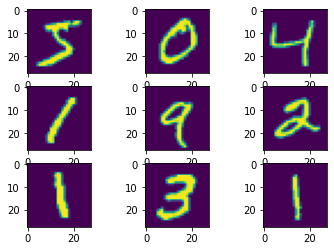

In [7]:
for i in range(0,9):
  plt.subplot(330+1+i)
  plt.imshow(x_train[i])#, cmap='gray')

In [8]:
print(y_train[3])

1


In [9]:
x_train = x_train/255.0
x_test = x_test/255.0

In [10]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [11]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Flatten(input_shape=(28,28)),
                                    tf.keras.layers.Dense(128, activation='relu'),
                                    tf.keras.layers.Dense(10, activation='softmax')
])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
x_train.shape

(60000, 28, 28)

In [15]:
y_train.shape

(60000,)

In [16]:
x_train[0].shape

(28, 28)

In [17]:
history = model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2589 - accuracy: 0.9258
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1118 - accuracy: 0.9674
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0775 - accuracy: 0.9769
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0560 - accuracy: 0.9830
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0428 - accuracy: 0.9867


In [18]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0841 - accuracy: 0.9742


[0.08407817035913467, 0.9742000102996826]

Text(0.5, 1.0, 'TRAINING LOSS')

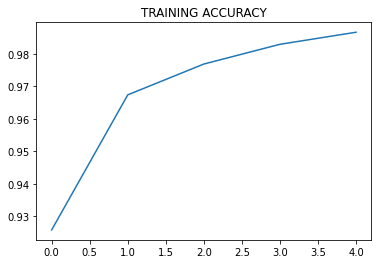

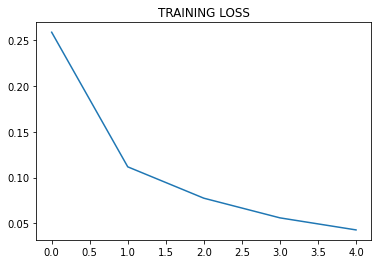

In [19]:
acc = history.history['accuracy']
epochs = range(len(acc))
plt.plot(epochs, acc)
plt.title('TRAINING ACCURACY')

plt.figure()

loss = history.history['loss']
plt.plot(epochs, loss)
plt.title('TRAINING LOSS')

In [20]:
import numpy as np
p=model.predict(x_test)
p = [np.argmax(x) for x in p]

In [21]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,p))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.95      0.97      1032
           3       0.93      0.99      0.96      1010
           4       0.97      0.97      0.97       982
           5       0.99      0.96      0.98       892
           6       0.98      0.98      0.98       958
           7       0.99      0.96      0.98      1028
           8       0.96      0.98      0.97       974
           9       0.96      0.97      0.97      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [22]:
import seaborn as sns
labels = ['0','1','2','3','4','5','6','7','8','9']
cm=confusion_matrix(y_test,p)
print(cm)

[[ 972    0    0    2    1    0    1    0    3    1]
 [   0 1120    1    6    0    0    3    0    4    1]
 [   6    1  976   20    3    0    3    3   19    1]
 [   0    0    0 1001    0    0    0    3    3    3]
 [   4    0    2    1  954    0    3    2    1   15]
 [   2    0    0   24    1  856    4    0    4    1]
 [   4    3    0    1    4    6  939    0    1    0]
 [   1    1    7    7    4    0    0  990    4   14]
 [   3    0    0    6    4    1    2    2  952    4]
 [   5    1    0    6    9    0    0    2    4  982]]


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [23]:
model.save('mnist.h5')

In [24]:
!pip install streamlit

     |████████████████████████████████| 7.2MB 9.9MB/s 
     |████████████████████████████████| 4.4MB 45.2MB/s 
     |████████████████████████████████| 102kB 13.3MB/s 
     |████████████████████████████████| 112kB 54.1MB/s 
     |████████████████████████████████| 122kB 57.8MB/s 
  Created wheel for watchdog: filename=watchdog-0.10.3-cp36-none-any.whl size=73873 sha256=26142603d932854a52c2aec4f9bc3686ef9a8d85f98d36fb5234a4344e40c163
  Stored in directory: /root/.cache/pip/wheels/a8/1d/38/2c19bb311f67cc7b4d07a2ec5ea36ab1a0a0ea50db994a5bc7
  Created wheel for blinker: filename=blinker-1.4-cp36-none-any.whl size=13450 sha256=675991e41e916588988138f1ec775670f8b8367ac274e5dd2455cdd7b9017a33
  Stored in directory: /root/.cache/pip/wheels/92/a0/00/8690a57883956a301d91cf4ec999cc0b258b01e3f548f86e89
  Created wheel for pathtools: filename=pathtools-0.1.2-cp36-none-any.whl size=8785 sha256=d276e100a138f86c3a2a2567eb893a9104e704455e3e2df7365523e72461823c
  Stored in directory: /root/.cache/pip/whee

In [25]:
!pip install pyngrok

  Created wheel for pyngrok: filename=pyngrok-4.1.10-cp36-none-any.whl size=16378 sha256=1e321b3f3e64b4555a70662f4b64f4cc300c56eaa01d738b3bd567c0d3d311ff
  Stored in directory: /root/.cache/pip/wheels/0d/7f/06/e8079dd6f80eb6683fac47c4e1cb720b61cd82d6e4c13d87a5
Successfully built pyngrok


In [26]:
%%writefile predict.py

import streamlit as st
import tensorflow as tf

st.set_option('deprecation.showfileUploaderEncoding',False) #ignores the streamlit warning
@st.cache(allow_output_mutation=True) #the model is loaded only once and stored in cache memory

def load_model():
  model = tf.keras.models.load_model('/content/mnist.h5')
  return model

model = load_model()

st.write("""
    #MNIST Classification Model
    """
) #title of webpage

file = st.file_uploader('Please upload an image', type=['jpg','png']) #file_uploader uploads the image

import cv2
import PIL
from PIL import Image, ImageOps
import numpy as np

#accepts an image, fetches the model and gives out prediction
def import_and_predict(image_data, model):
  size = (784,1)
  image = ImageOps.fit(image_data, size, Image.ANTIALIAS) #antialias resized the image into that dimension
  img = np.asarray(image)
  img_reshape = img[np.newaxis,...]  
  prediction = model.predict(img_reshape)

  return prediction

if file is None:
  st.text('Please upload an image')
else:
  image = Image.open(file) #opening the image
  st.image(image, use_column_width=True) #displaying the image
  predictions = import_and_predict(image, model) #supplying the image and model
  class_names = ['0','1','2','3','4','5','6','7','8','9']
  string = 'This image most likely is: ' + class_names[np.argmax(predictions)]
  #calculationg the position of max probability and its class is picked up
  st.success(string) #displays the ouput in a box

Writing predict.py


In [27]:
!ngrok authtoken 1gfUTu4cBwBUBvcb1HCPbjdkl4j_4tRvCaHJy5aW8Aj92XE5v #creates yml file which contains authentication id which is used to deploy local app to web server

Traceback (most recent call last):
  File "/usr/lib/python3.6/urllib/request.py", line 1325, in do_open
    encode_chunked=req.has_header('Transfer-encoding'))
  File "/usr/lib/python3.6/http/client.py", line 1264, in request
    self._send_request(method, url, body, headers, encode_chunked)
  File "/usr/lib/python3.6/http/client.py", line 1310, in _send_request
    self.endheaders(body, encode_chunked=encode_chunked)
  File "/usr/lib/python3.6/http/client.py", line 1259, in endheaders
    self._send_output(message_body, encode_chunked=encode_chunked)
  File "/usr/lib/python3.6/http/client.py", line 1038, in _send_output
    self.send(msg)
  File "/usr/lib/python3.6/http/client.py", line 976, in send
    self.connect()
  File "/usr/lib/python3.6/http/client.py", line 1425, in connect
    server_hostname=server_hostname)
  File "/usr/lib/python3.6/ssl.py", line 407, in wrap_socket
    _context=self, _session=session)
  File "/usr/lib/python3.6/ssl.py", line 817, in __init__
    self.do_

In [28]:
!nohup streamlit run predict.py & #stores the output to a different file

nohup: appending output to 'nohup.out'


In [29]:
from pyngrok import ngrok
url = ngrok.connect(port=8501) 
url

'http://deaaa8bfb058.ngrok.io'

In [30]:
!cat /content/nohup.out

2020-09-01 09:22:01.213679: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:8501
  External URL: http://35.240.231.56:8501

2020-09-01 09:22:02.516995: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2020-09-01 09:22:02.522950: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:982] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-09-01 09:22:02.523674: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.73GiB deviceMemoryBandwidth: 298.08GiB/s
2020-09-01 09:22:02.523718: I tensorflow/stream_executor/platform/default/dso_loa